## SMS Spam Classification

Importing Necessary Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
import re
nltk.download("stopwords")
nltk.download("wordnet")
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import warnings; warnings.filterwarnings('ignore')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


Reading and Understanding the data

In [ ]:
df = pd.read_csv("/content/Spam SMS Collection.txt", sep = '\t', names = ['label','message'])
df.head()

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [ ]:
df.shape

(5572, 2)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   label    5572 non-null   object
 1   message  5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [ ]:
df.describe()

,label,message
count,5572,5572
unique,2,5169
top,ham,"Sorry, I'll call later"
freq,4825,30


In [ ]:
df.isna().sum()

label      0
message    0
dtype: int64

Encoding

In [ ]:
# mapping values for label columns
df["label"] = df["label"].map({"ham":0, "spam":1})

In [ ]:
df.head()

,label,message
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


Explorartory data analysis

Text(0, 0.5, 'Count')

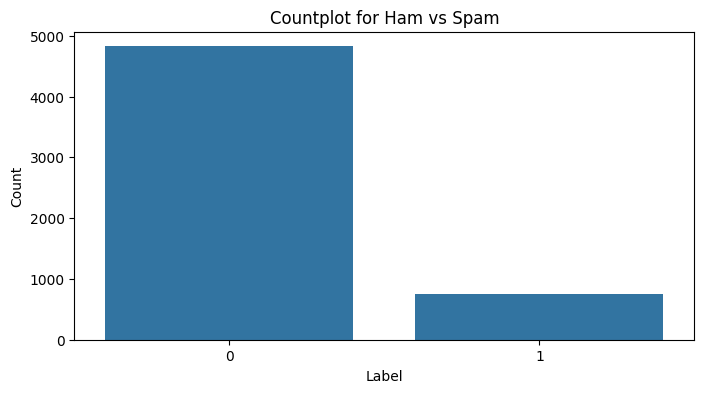

In [ ]:
# plotting countplot the spam vs ham
plt.figure(figsize = (8,4))
sns.countplot(x = df["label"], data = df)
plt.title("Countplot for Ham vs Spam")
plt.xlabel("Label")
plt.ylabel("Count")

From the above countplot it shows that the data is highly imbalanced

In [ ]:
only_spam = df[df["label"] == 1]
print("Number of Spam records: {}".format(only_spam.shape[0]))
print("Number of Ham records: {}".format(df.shape[0]-only_spam.shape[0]))

Number of Spam records: 747
Number of Ham records: 4825


In [ ]:
# Handling imbalanced dataset using Oversampling
count = int((df.shape[0] - only_spam.shape[0])/ only_spam.shape[0])
for i in range(0, count-1):
  df = pd.concat([df, only_spam])

df.shape

(9307, 2)

Text(0, 0.5, 'Count')

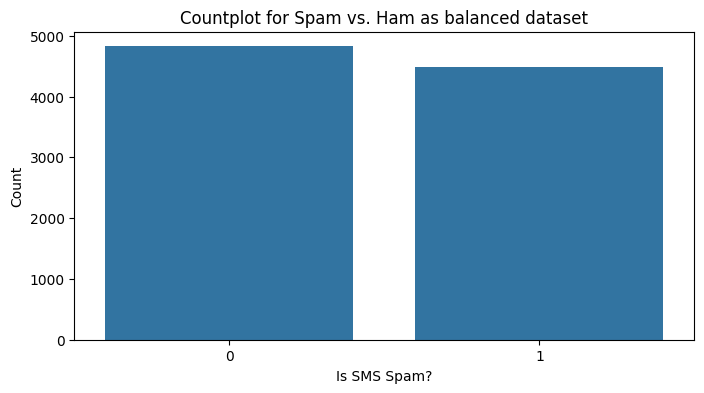

In [ ]:
# plotting countplot the spam vs ham
plt.figure(figsize = (8,4))
sns.countplot(x = df["label"], data = df)
plt.title("Countplot for Spam vs. Ham as balanced dataset")
plt.xlabel("Is SMS Spam?")
plt.ylabel("Count")

Feature Engineering

In [ ]:
# creating new feature word count
df["word_count"] = df["message"].apply(lambda x : len(x.split( )))

In [ ]:
df.head()

,label,message,word_count
0,0,"Go until jurong point, crazy.. Available only ...",20
1,0,Ok lar... Joking wif u oni...,6
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,28
3,0,U dun say so early hor... U c already then say...,11
4,0,"Nah I don't think he goes to usf, he lives aro...",13


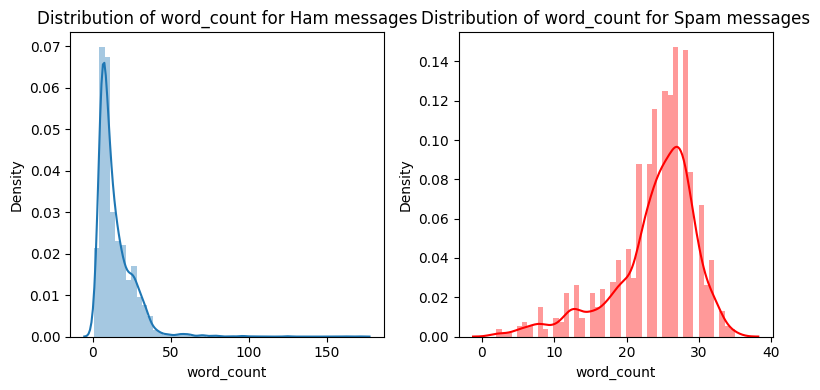

In [ ]:
plt.figure(figsize=(8, 4))

plt.subplot(1, 2, 1)
g = sns.distplot(a=df[df['label']==0].word_count)
p = plt.title('Distribution of word_count for Ham messages')

plt.subplot(1, 2, 2)
g = sns.distplot(a=df[df['label']==1].word_count, color='red')
p = plt.title('Distribution of word_count for Spam messages')

plt.tight_layout()
plt.show()


Insight: Spam messages word_count fall in the range of 15-30 words, whereas majority of the Ham messages fall in the range of below 25 words.

In [ ]:
# creating feature contains_currency_symbol
def currency(x):
  currency_symbols = ['€', '$', '¥', '£', '₹']
  for i in currency_symbols:
    if i in x:
      return 1
  return 0

df["contains_currency_symbol"] = df["message"].apply(currency)

In [ ]:
df.tail()

,label,message,word_count,contains_currency_symbol
5537,1,Want explicit SEX in 30 secs? Ring 02073162414...,16,0
5540,1,ASKED 3MOBILE IF 0870 CHATLINES INCLU IN FREE ...,33,1
5547,1,Had your contract mobile 11 Mnths? Latest Moto...,28,0
5566,1,REMINDER FROM O2: To get 2.50 pounds free call...,28,0
5567,1,This is the 2nd time we have tried 2 contact u...,30,1


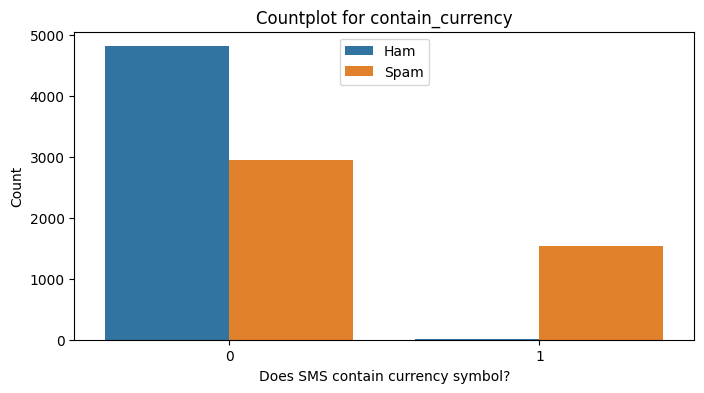

In [ ]:
# countplot for contains_currency_symbol
plt.figure(figsize = (8,4))
sns.countplot(x = "contains_currency_symbol", data = df, hue = 'label')
plt.title('Countplot for contain_currency')
plt.xlabel('Does SMS contain currency symbol?')
plt.ylabel('Count')
plt.legend(labels=['Ham', 'Spam'], loc=9)

Insight: Almost 1/3 of Spam messages contain currency symbols, and currency symbols are rarely used in Ham messages.

In [ ]:
# creating feature contains number
def number(x):
  for i in x:
    if ord(i) >= 48 and ord(i) <= 57:
      return 1
  return 0

df["contains_number"] = df["message"].apply(number)

In [ ]:
df.head()

,label,message,word_count,contains_currency_symbol,contains_number
0,0,"Go until jurong point, crazy.. Available only ...",20,0,0
1,0,Ok lar... Joking wif u oni...,6,0,0
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,28,0,1
3,0,U dun say so early hor... U c already then say...,11,0,0
4,0,"Nah I don't think he goes to usf, he lives aro...",13,0,0


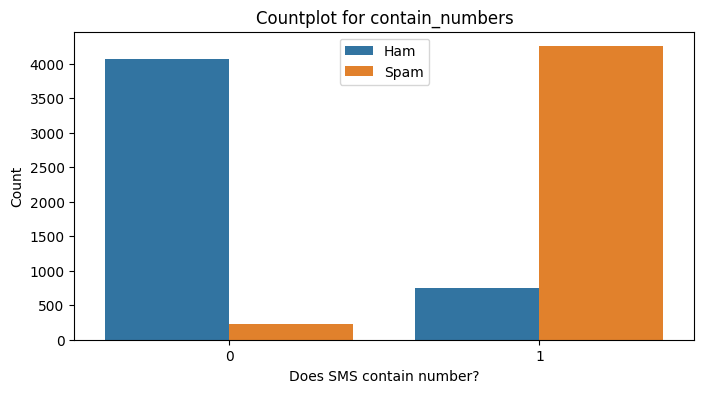

In [ ]:
# Countplot for contains_number
plt.figure(figsize=(8,4))
sns.countplot(x='contains_number', data=df, hue='label')
plt.title('Countplot for contain_numbers')
plt.xlabel('Does SMS contain number?')
plt.ylabel('Count')
plt.legend(labels=['Ham', 'Spam'], loc=9)

Insight: It is evident that most of the Spam messages contain numbers, and majority of the Ham messages do not contain numbers.

### Data Cleaning

In [ ]:
# cleaning the messages
corpus = []
wnl = WordNetLemmatizer()

for sms_string in list(df.message):
  # Cleaning special character from the sms
  message = re.sub(pattern = '[^a-zA-Z]', repl= ' ', string = sms_string)
  # Converting the entire sms into lower case
  message = message.lower()
  # Tokenizing the sms by words
  words = message.split()
  # Removing the stop words
  filtered_words = [word for word in words if word not in set(stopwords.words('english'))]
  # Lemmatizing the words
  lemmatized_words = [wnl.lemmatize(word) for word in filtered_words]
  # Joining the lemmatized words
  message = ' '.join(lemmatized_words)
  # Building a corpus of messages
  corpus.append(message)

In [ ]:
corpus[0:3]

['go jurong point crazy available bugis n great world la e buffet cine got amore wat',
 'ok lar joking wif u oni',
 'free entry wkly comp win fa cup final tkts st may text fa receive entry question std txt rate c apply']

In [ ]:

# Creating the Bag of Words model
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(max_features=500)
vectors = tfidf.fit_transform(corpus).toarray()
feature_names = tfidf.get_feature_names_out()

In [ ]:
# Extracting independent and dependent variables from the dataset
x = pd.DataFrame(vectors, columns= feature_names)
y = df['label']

In [ ]:
x.head()

,ac,access,account,address,admirer,age,already,also,always,amp,...,xxx,ya,yeah,year,yes,yesterday,yet,yo,yr,yup
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.4117,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### Model Building & Evaluation

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.2, random_state = 42)

### Naive Bayes model

In [ ]:
# fitting naive bayes to training set
from sklearn.naive_bayes import MultinomialNB
mnb = MultinomialNB()
cv = cross_val_score(mnb, x, y, scoring = "f1", cv = 10)
print('Average F1-Score for MNB model: {}'.format(round(cv.mean(), 3)))
print('Standard Deviation: {}'.format(round(cv.std(), 3)))

Average F1-Score for MNB model: 0.943
Standard Deviation: 0.004


In [ ]:
# Classification report for MNB model
mnb = MultinomialNB()
mnb.fit(x_train, y_train)
y_pred = mnb.predict(x_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.94      0.94      0.94       959
           1       0.94      0.94      0.94       903

    accuracy                           0.94      1862
   macro avg       0.94      0.94      0.94      1862
weighted avg       0.94      0.94      0.94      1862



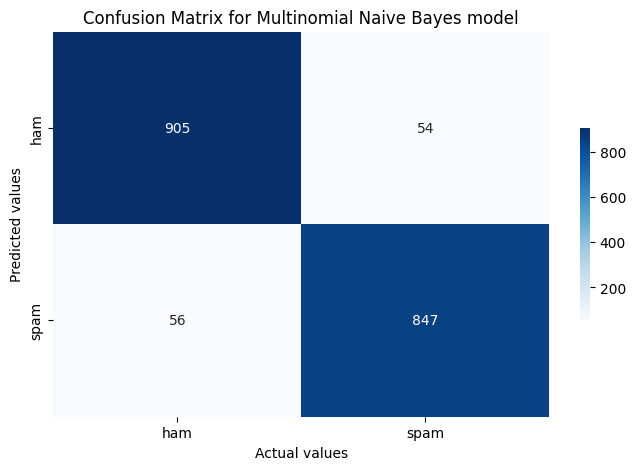

In [ ]:
# Confusion matrix of MNB model
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize = (8,5))
axis_labels = ['ham', 'spam']
sns.heatmap(data=cm, annot=True, cmap="Blues", xticklabels=axis_labels, yticklabels=axis_labels, fmt='g', cbar_kws={"shrink": 0.5})
plt.xlabel('Actual values')
plt.ylabel('Predicted values')
plt.title('Confusion Matrix for Multinomial Naive Bayes model')
plt.show()

### Decision Tree model

In [ ]:
# Fitting Decision tree to the Training set
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
cv = cross_val_score(dt, x, y, scoring = "f1", cv = 10)
print('Average F1-Score for Decision model: {}'.format(round(cv.mean(), 3)))
print('Standard Deviation: {}'.format(round(cv.std(), 3)))

Average F1-Score for Decision model: 0.98
Standard Deviation: 0.002


In [ ]:
# Classification report for Decision Tree model
dt = DecisionTreeClassifier()
dt.fit(x_train, y_train)
y_pred = dt.predict(x_test)

print('Classification report for Decision Tree model')
print(classification_report(y_test, y_pred))

Classification report for Decision Tree model
              precision    recall  f1-score   support

           0       1.00      0.97      0.98       959
           1       0.97      1.00      0.98       903

    accuracy                           0.98      1862
   macro avg       0.98      0.98      0.98      1862
weighted avg       0.98      0.98      0.98      1862



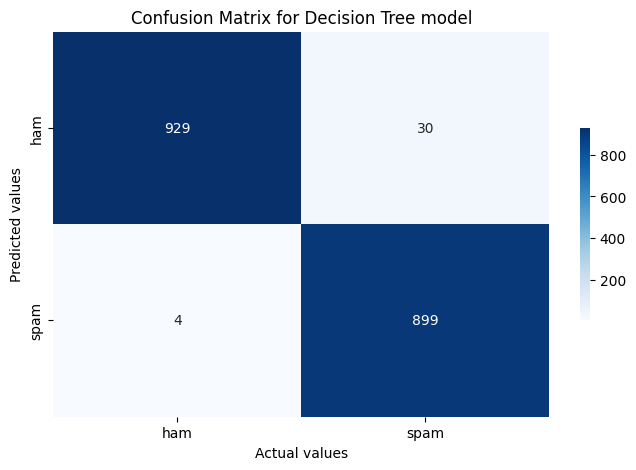

In [ ]:
# Confusion matrix of Decision Tree model
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8,5))
axis_labels = ['ham', 'spam']
sns.heatmap(data=cm, annot=True, cmap="Blues", xticklabels=axis_labels, yticklabels=axis_labels, fmt='g', cbar_kws={"shrink": 0.5})
plt.xlabel('Actual values')
plt.ylabel('Predicted values')
plt.title('Confusion Matrix for Decision Tree model')
plt.show()

### Random Forest model

In [ ]:
# Fitting Random Forest to the Training set
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=10)
cv = cross_val_score(rf, x, y, scoring='f1', cv=10)
print('Average F1-Score for Random Forest model: {}'.format(round(cv.mean(), 3)))
print('Standard Deviation: {}'.format(round(cv.std(), 3)))

Average F1-Score for Random Forest model: 0.995
Standard Deviation: 0.003


In [ ]:
# Classification report for Random Forest model
rf = RandomForestClassifier(n_estimators=20)
rf.fit(x_train, y_train)
y_pred = rf.predict(x_test)

print('Classification report for Random Forest model')
print(classification_report(y_test, y_pred))

Classification report for Random Forest model
              precision    recall  f1-score   support

           0       1.00      0.99      0.99       959
           1       0.99      1.00      0.99       903

    accuracy                           0.99      1862
   macro avg       0.99      0.99      0.99      1862
weighted avg       0.99      0.99      0.99      1862



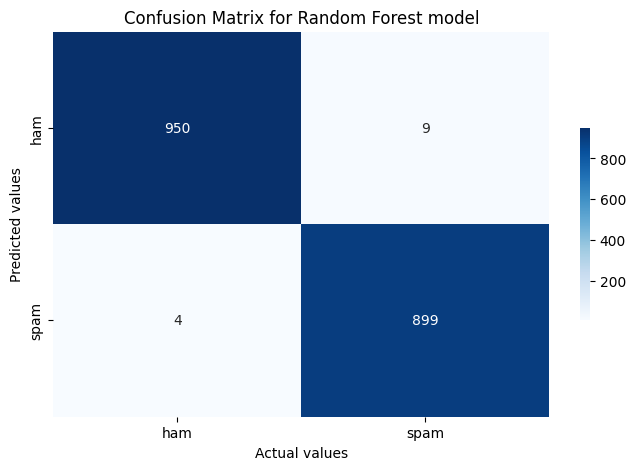

In [ ]:
# Confusion matrix of Decision Tree model
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8,5))
axis_labels = ['ham', 'spam']
sns.heatmap(data=cm, annot=True, cmap="Blues", xticklabels=axis_labels, yticklabels=axis_labels, fmt='g', cbar_kws={"shrink": 0.5})
plt.xlabel('Actual values')
plt.ylabel('Predicted values')
plt.title('Confusion Matrix for Random Forest model')
plt.show()

### Random Forest algorithm is selected for predicting the results of this problem.

### Making Predictions

In [ ]:
def predict_spam(sample_message):
  sample_message = re.sub(pattern='[^a-zA-Z]',repl=' ', string = sample_message)
  sample_message = sample_message.lower()
  sample_message_words = sample_message.split()
  sample_message_words = [word for word in sample_message_words if not word in set(stopwords.words('english'))]
  final_message = [wnl.lemmatize(word) for word in sample_message_words]
  final_message = ' '.join(final_message)

  temp = tfidf.transform([final_message]).toarray()
  return rf.predict(temp)

In [ ]:
# Prediction 1 - Lottery text message
sample_message = 'IMPORTANT - You could be entitled up to £3,160 in compensation from mis-sold PPI on a credit card or loan. Please reply PPI for info or STOP to opt out.'

if predict_spam(sample_message):
  print('This is a SPAM message.')
else:
  print('This is a HAM message.')

This is a SPAM message.


In [ ]:
# Prediction 2 - Casual text chat
sample_message = 'Came to think of it. I have never got a spam message before.'

if predict_spam(sample_message):
  print('This is a SPAM message.')
else:
  print('This is a HAM  message.')


This is a HAM  message.


In [ ]:
# Prediction 3 - Transaction confirmation text message
sample_message = 'Sam, your rent payment for Jan 19 has been received. $1,300 will be drafted from your Wells Fargo Account ******0000 within 24-48 business hours. Thank you!'

if predict_spam(sample_message):
  print('This is a SPAM message.')
else:
  print('This is a HAM message.')

This is a HAM message.


In [ ]:

# Predicting values 4 - Feedback message
sample_message = 'Tammy, thanks for choosing Carl’s Car Wash for your express polish. We would love to hear your thoughts on the service. Feel free to text back with any feedback. Safe driving!'

if predict_spam(sample_message):
  print('This is a SPAM message.')
else:
  print('This is a HAM message.')

This is a SPAM message.
